## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Importing Required Libraries </div>

In [ ]:
# Libray for Data Manipulation.
import numpy as np
import pandas as pd

#Library for Data Visualization.
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.2)
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)

# Library to overcome Warnings.
import warnings
warnings.filterwarnings("ignore")

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Loading Dataset </div>

In [ ]:
df = pd.read_excel('/content/Data_Train.xlsx')

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Basic Understanding of Data </div>

### 1. Checking Dimensions of the Dataset

In [ ]:
print("Total number of records present in the dataset is:",df.shape[0])
print("Total number of attributes present in the dataset is:",df.shape[1])

Total number of records present in the dataset is: 10683
Total number of attributes present in the dataset is: 11


### 2. Fetching the Attributes Names.

In [ ]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

### 3. Basic Information of the data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* There is total **10683 records** and **11 columns** availabe in the dataset.
* **Out of 10 columns** there are **1 numerical column** and **10 categorical columns.**</div>

### 4. Statistical Information on the data.

In [ ]:
#Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [ ]:
#categorical Columns
df.describe(include="object").T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,No info,8345


### 5. Computing Total No. of Missing Values.

In [ ]:
null_counts = df.isnull().sum().sort_values(ascending = False)
null_percentages = round((null_counts/len(df))*100,2)
null_summary = pd.concat([null_counts, null_percentages], axis=1)
null_summary.columns = ['Null_Count', 'Null_%']
null_summary

,Null_Count,Null_%
Route,1,0.01
Total_Stops,1,0.01
Airline,0,0.00
Date_of_Journey,0,0.00
Source,0,0.00
Destination,0,0.00
Dep_Time,0,0.00
Arrival_Time,0,0.00
Duration,0,0.00
Additional_Info,0,0.00


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* There is **1 missing records** in **'Route'** and **'Total_Stops'** feature.

In [ ]:
#droping the missing values
df.dropna(inplace=True)

### 6. Checking Duplicate Records.

In [ ]:
df.duplicated().sum()

220

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* There are **220 duplicate records** in the dataset.

In [ ]:
#droping the duplicates
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
#shape of dataset after droppinfg null value
df.shape

(10462, 11)

### 7. Checking Unique Value in Columns

In [ ]:
# List of columns to exclude from checking unique values
columns_to_exclude = ['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration', 'Price' , 'Route']

unique_values = {}

for column in df.columns:
    if column not in columns_to_exclude:
        unique_vals = df[column].unique()
        unique_values[column] = unique_vals

for column, values in unique_values.items():
    print(f"Column '{column}':\n{values}\n{'*' * 50}\n")

Column 'Airline':
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
**************************************************

Column 'Source':
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
**************************************************

Column 'Destination':
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
**************************************************

Column 'Total_Stops':
['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']
**************************************************

Column 'Additional_Info':
['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']
**************************************************



### 8. Checking Unique Value Counts in Columns

In [ ]:
# Columns to exclude
columns_to_exclude = ['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration', 'Price' , 'Route']

unique_counts = {}

for column in df.columns:
    if column not in columns_to_exclude:
        unique_count = df[column].value_counts()
        unique_counts[column] = unique_count
for column, counts in unique_counts.items():
    print(f"Column '{column}':\n{counts}\n{'*' * 50}\n")

Column 'Airline':
Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64
**************************************************

Column 'Source':
Source
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64
**************************************************

Column 'Destination':
Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64
*************************************

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Majority of Records in 'Additional_Info' column has no info. We can later drop this feature
* There is only one flight with 4 stops.
* Trujet Airline is having only one entry in the dataset. We will merge it in Multiple Carrier.
* There is very less flight details for premium econony. we will merge business and economy class.
* 'New Delhi' and 'Delhi' are shown as Seperate city in destination feature. We will merge them in one.

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Feature Engineering</div>

### 1. Converting 'Total_Stops' feature from object to int

In [ ]:
df['Total_Stops'] = df["Total_Stops"].str.replace('non-stop','0')
df['Total_Stops'] = df["Total_Stops"].str.replace('stops','')
df['Total_Stops'] = df["Total_Stops"].str.replace('stop','')
df['Total_Stops'] = df["Total_Stops"].str.replace(' ','')
df['Total_Stops'] = df["Total_Stops"].astype(int)

### 2. Merging 'New Delhi' with 'Delhi' in Destination column (name of same city)

In [ ]:
df['Destination'] = np.where(df['Destination']=="New Delhi","Delhi",df['Destination'])

### 3. Merging trujet into multiple carrier - only single entry for Trujet

In [ ]:
df['Airline'] = np.where(df['Airline']=="Trujet","Multiple carriers",df['Airline'])

### 4. Merging business class with econony class - few data available for business class

In [ ]:
df['Airline'] = np.where(df['Airline']=="Jet Airways Business","Jet Airways",df['Airline'])
df['Airline'] = np.where(df['Airline']=="Vistara Premium economy","Vistara",df['Airline'])
df['Airline'] = np.where(df['Airline']=="Multiple carriers Premium economy","Multiple carriers",df['Airline'])

### 5. Coverting 'Duration' from hh:mm to hh

In [ ]:
df['Duration'] = df['Duration'].str.replace('h','*1').str.replace(' ','+').str.replace('m','/60').apply(eval)

# Round the values in the ''Duration' column to 2 decimal points
df['Duration'] = df['Duration'].apply(lambda x: round(x, 2))

### 6. Extracting 'Year', 'Month' and 'Day' and 'Weekday' value form 'Date_of_Journey' Column

In [ ]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['day'] = pd.DatetimeIndex(df['Date_of_Journey']).day
df['month'] = pd.DatetimeIndex(df['Date_of_Journey']).month
df['year'] = pd.DatetimeIndex(df['Date_of_Journey']).year
df['weekday'] = pd.DatetimeIndex(df['Date_of_Journey']).weekday

### 7. Checking Unique Values in Columns Extracted from 'Date_of_Journey' Column

In [ ]:
cols = ['day', 'month', 'year', 'weekday']

unique_values = {}

for column in df.columns:
    if column in cols:
        unique_vals = df[column].unique()
        unique_values[column] = unique_vals

for column, values in unique_values.items():
    print(f"Column '{column}':\n{values}\n{'*' * 50}\n")

In [ ]:
#Their is  single value in 'year' column, so we can drop it
#Also dropping 'Date_of_Journey' Column since we have extracted necessary features from it.

df = df.drop(['year', 'Date_of_Journey'], axis = 1)

### 8. Converting 'Dep_Time' & 'Arrival_Time' into datetime

In [ ]:
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])

In [ ]:
# creating a function for extracting hour and minutes

def extract_hour(data,col):
    data[col+'_Hour']=data[col].dt.hour

def extract_min(data,col):
    data[col+'_Min']=data[col].dt.minute

In [ ]:
#extracting hours and minutes  from 'Dep_Time' & 'Arrival_Time'

extract_hour(df,'Dep_Time')
extract_min(df,'Dep_Time')
extract_hour(df,'Arrival_Time')
extract_min(df,'Arrival_Time')

In [ ]:
df['Dep_Time'] = df['Dep_Time'].dt.strftime('%H:%M')
df['Arrival_Time'] = df['Arrival_Time'].dt.strftime('%H:%M')

In [ ]:
#creating function to categorize 'Arrival_Time' and 'Dep_Time'

def categorize_time(time_str):
    time = pd.to_datetime(time_str, format='%H:%M').time()

    if time >= pd.to_datetime('08:00', format='%H:%M').time() and time < pd.to_datetime('12:00', format='%H:%M').time():
        return 'Morning'
    elif time >= pd.to_datetime('12:00', format='%H:%M').time() and time < pd.to_datetime('16:00', format='%H:%M').time():
        return 'Afternoon'
    elif time >= pd.to_datetime('16:00', format='%H:%M').time() and time < pd.to_datetime('20:00', format='%H:%M').time():
        return 'Evening'
    elif time >= pd.to_datetime('20:00', format='%H:%M').time() and time <= pd.to_datetime('23:59', format='%H:%M').time():
        return 'Night'
    elif time >= pd.to_datetime('00:00', format='%H:%M').time() and time < pd.to_datetime('04:00', format='%H:%M').time():
        return 'Late_Night'
    else:
        return 'Early_Morning'

In [ ]:
df['Dep_Time_Category'] = df['Dep_Time'].apply(categorize_time)
df['Arrival_Time_Category'] = df['Arrival_Time'].apply(categorize_time)

In [ ]:
#dropping 'Additional_Info' - there is no info available for almost 70% data
#dropping 'Route' - we have info available on Total_Stops, Source and Destination City
#droping 'Dep_Time', 'Arrival_Time' - we have already extrcted the required features

df = df.drop(['Additional_Info', 'Route', 'Dep_Time', 'Arrival_Time'], axis = 1)

In [ ]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,day,month,weekday,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,Dep_Time_Category,Arrival_Time_Category
0,IndiGo,Banglore,Delhi,2.83,0,3897,24,3,6,22,20,1,10,Night,Late_Night
1,Air India,Kolkata,Banglore,7.42,2,7662,1,5,2,5,50,13,15,Early_Morning,Afternoon
2,Jet Airways,Delhi,Cochin,19.00,2,13882,9,6,6,9,25,4,25,Morning,Early_Morning
3,IndiGo,Kolkata,Banglore,5.42,1,6218,12,5,6,18,5,23,30,Evening,Night
4,IndiGo,Banglore,Delhi,4.75,1,13302,1,3,4,16,50,21,35,Evening,Night


## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color:black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Explorator Data Analysis</div>

In [ ]:
def count_plot(data, x_column):
    counts = data[x_column].value_counts().sort_values(ascending=False)
    custom_palette = sns.color_palette('Set1', len(counts))
    plt.figure(figsize=(8, 5))  # Further reduced figure size
    plt.xticks(rotation=45, fontsize=8)  # Decreased x-axis tick font size
    plt.yticks(fontsize=8)  # Decreased y-axis tick font size
    plt.xlabel(xlabel=x_column, fontsize=10, fontweight='bold')  # Adjusted label font properties

    ax = sns.countplot(data=data, x=x_column, order=counts.index, palette=custom_palette)

    total = len(data[x_column])
    for p in ax.patches:
        count = p.get_height()
        percentage = (count / total) * 100
        ax.annotate(f'{count}\n({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black')

    sns.despine()
    plt.title('Distribution of ' + x_column, fontsize=12, fontweight='bold')  # Adjusted title font size
    plt.xlabel(x_column, fontsize=10)  # Adjusted x-axis label font size
    plt.ylabel('Count', fontsize=10)  # Adjusted y-axis label font size
    plt.tight_layout()  # Improved spacing
    plt.show()


#### 1. Analysis of Airline

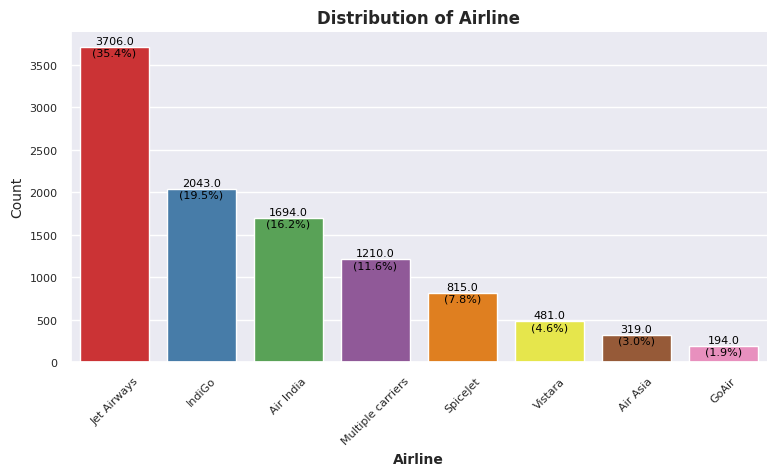

In [ ]:
count_plot(df, x_column='Airline')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Jet Airways is the most frequently used Airline, followed by Indigo.

#### 2. Analysis by Total Stops

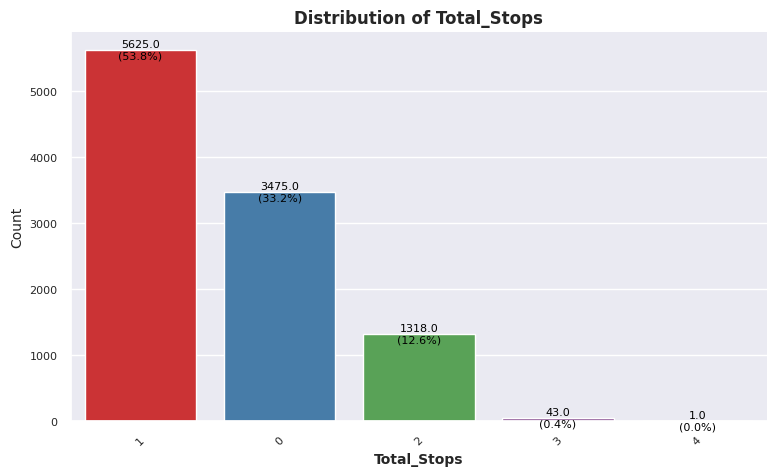

In [ ]:
count_plot(df, x_column='Total_Stops')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Majority of Airlines (~54%) have one stop only.

#### 3. Analysis by Source

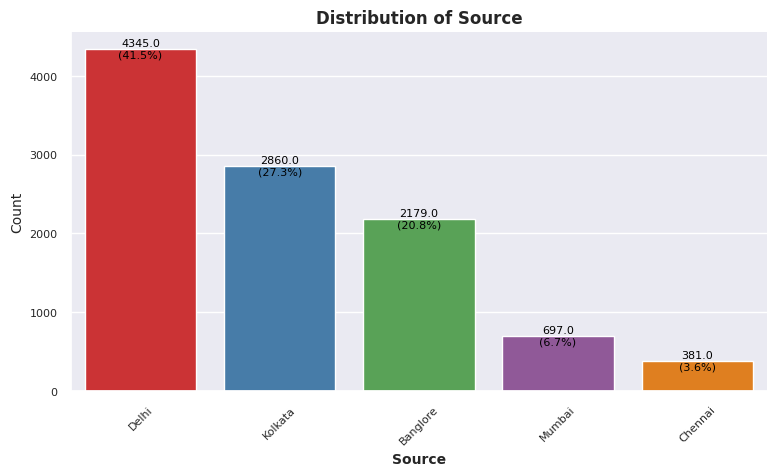

In [ ]:
count_plot(df, x_column='Source')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Delhi is the place from where majority of flight departs (~42%).

#### 7. Analysis by Month

#### 8. Analysis by Weekday

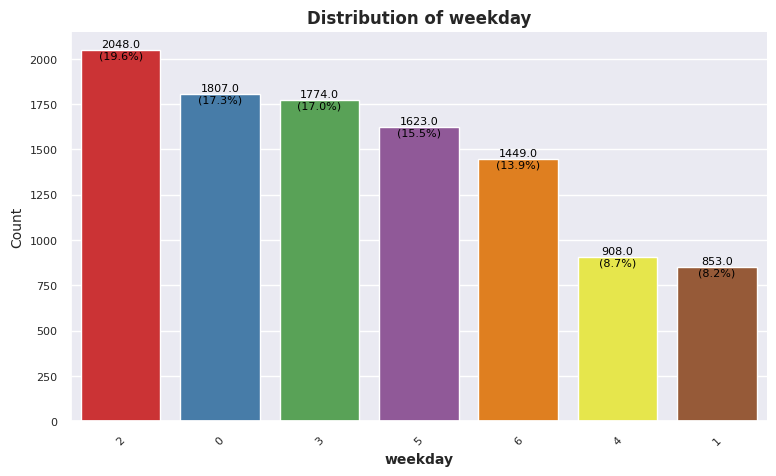

In [ ]:
count_plot(df, x_column='weekday')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Maximum number of flight are on Wednesday(21.3%), Thursday(17%) & Tuesday(15%).

#### 9. Analysis by Flight Day

In [ ]:
#Creating a function to plot distplot and boxplot

def dist_box_plot(df, col):
    plt.figure(figsize=(13.5, 6))
    plt.subplot(1, 2, 1)
    sns.distplot(df[col], kde=True)

    # Configure the x-axis to display integer values and center-align the labels
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, position=(0.5, 0), ha='center')  # Rotate x-axis labels by 90 degrees and center-align

    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)

    plt.subplot(1, 2, 2)
    sns.boxplot(y=col, data=df, palette='Set2')
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)
    plt.tight_layout()
    plt.show()

#### 10. Analysis by Flight Price

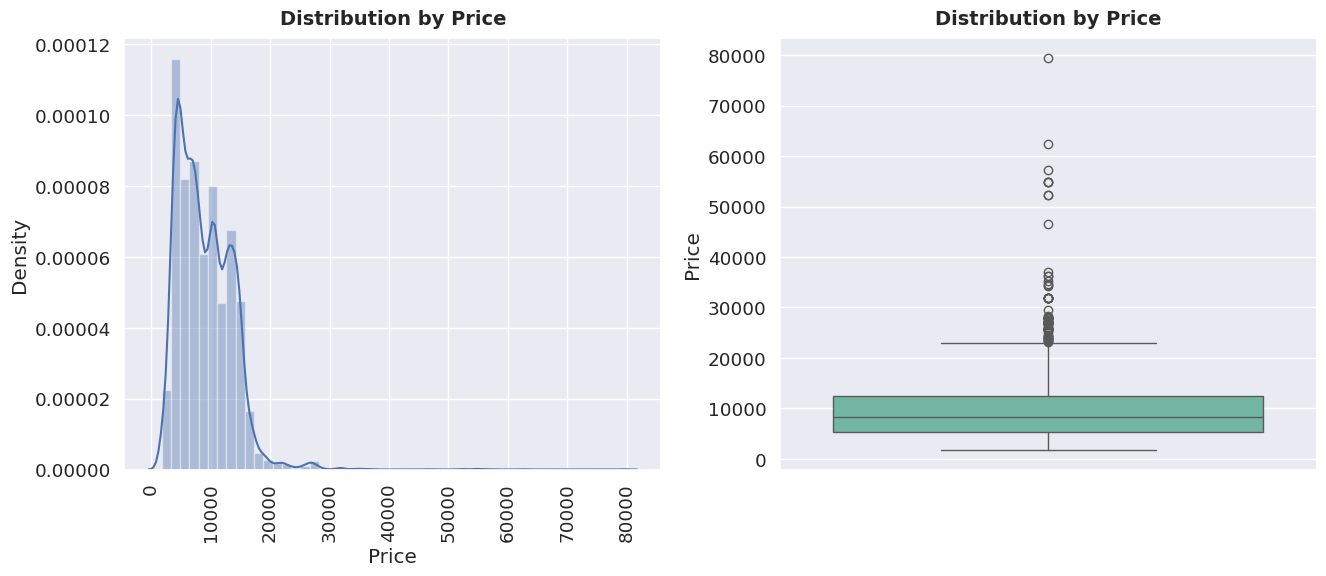

In [ ]:
dist_box_plot(df, 'Price')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* From the histplot, we infer that the 'Price' variable is right-skewed.
* From the boxplot we infer that there are outliers present in the 'Price' variable.

### Bivariate Analysis

#### 1. Average Price based on Flight Duration

In [ ]:
#Let's see how the duration of the flight may affect the final price.

df_temp = df.groupby(['Duration'])['Price'].mean().reset_index()

In [ ]:
plt.figure(figsize=(10,4))
ax = sns.scatterplot(x="Duration", y="Price", data=df_temp).set_title("Average Price depending on the Duration",fontsize=15)

NameError: name 'plt' is not defined

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Flight price increses steeply as flight duration increases till 10 hours.
* For flights with duration more than 10 hours, the increase in flight price is steady.

#### 2. Analysis of Flight Price based on Arrival and Departure Time

Text(0.5, 1.0, 'Airline Prices based on the Arrival Time')

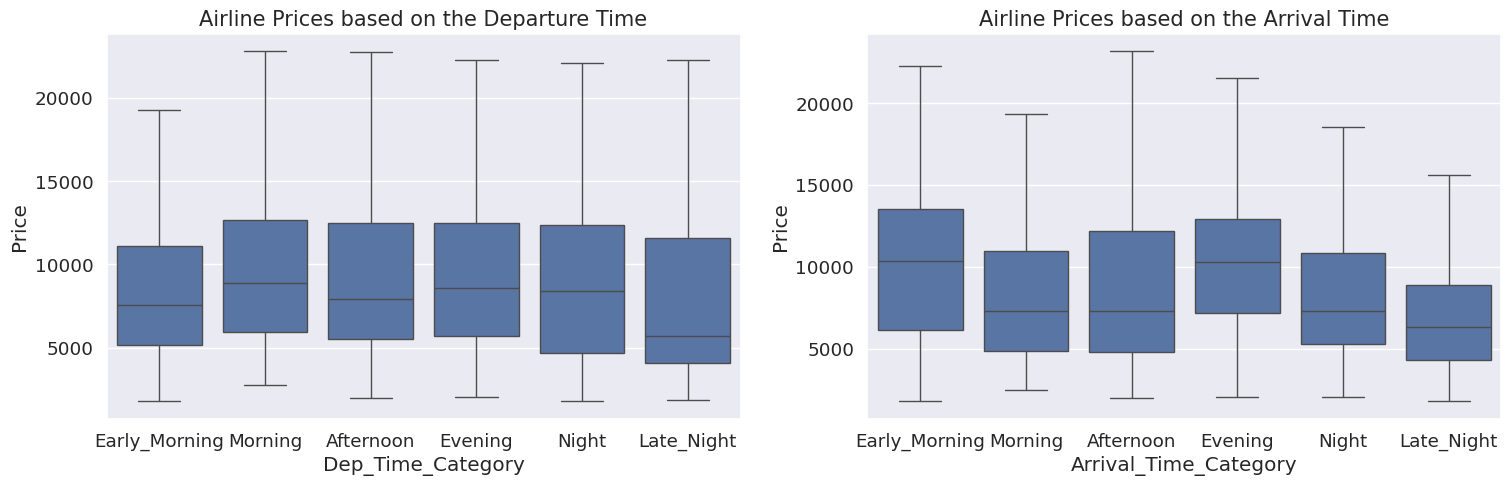

In [ ]:
flight_order = ["Early_Morning", "Morning", "Afternoon", "Evening", "Night", "Late_Night"]

plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="Price", x="Dep_Time_Category",showfliers=False, order = flight_order).set_title("Airline Prices based on the Departure Time", fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=df, y="Price", x="Arrival_Time_Category",showfliers=False, order = flight_order).set_title("Airline Prices based on the Arrival Time", fontsize=15)

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Early Morning Departure flight and Late Night Arrival flight are cheaper.

#### 3. Analysis of Flight Price based on Source and Destination City

Text(0.5, 1.0, 'Airline Prices based on the Destination City')

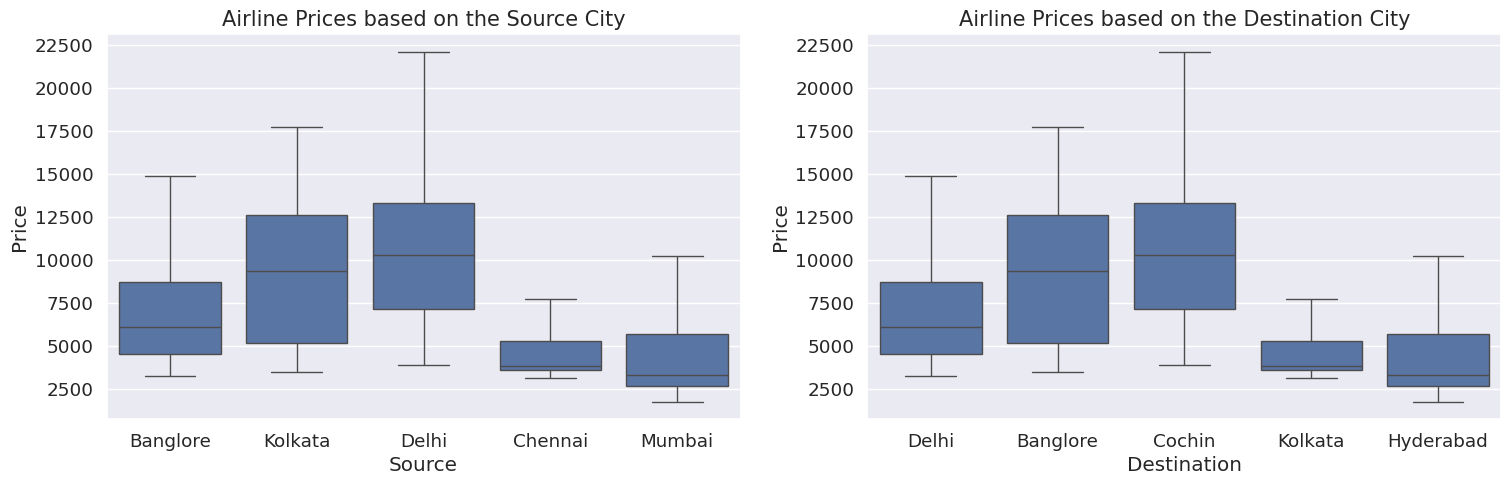

In [ ]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="Price", x="Source",showfliers=False).set_title("Airline Prices based on the Source City", fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=df, y="Price", x="Destination",showfliers=False).set_title("Airline Prices based on the Destination City", fontsize=15)

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Ticket price is low for flight having source city as Mumbai.
* Ticket price is high for flight having source city as Delhi.
* Ticket price is low for flight having destination city as Kilkata.
* Ticket price is high for flight having destination city as Cochin.

#### 4. Analysis of Flight Price based on Number of Stops

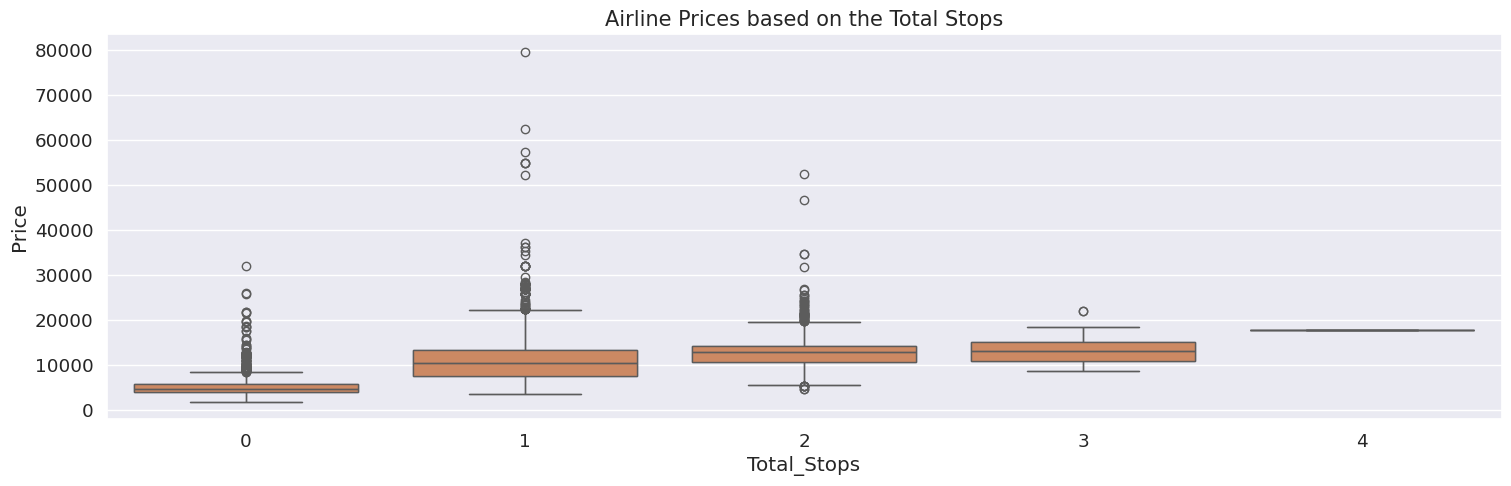

In [ ]:
plt.figure(figsize=(18,5))
sns.boxplot(x='Total_Stops',y='Price',data=df,palette='hls')
sns.boxplot(data=df, y="Price", x="Total_Stops",showfliers=False).set_title("Airline Prices based on the Total Stops", fontsize=15)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Flight with No Stops are Cheaper.
* As the no. of stops increase, flight price also increases.

#### 5. Analysis of Flight Price based on Airlines

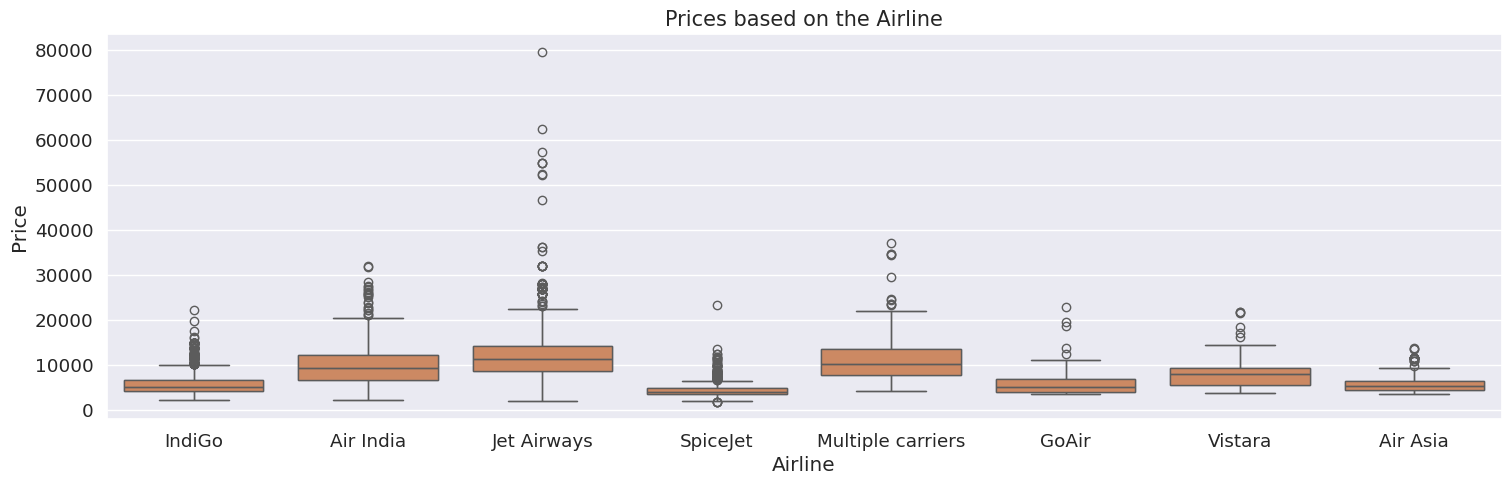

In [ ]:
plt.figure(figsize=(18,5))
sns.boxplot(x='Airline',y='Price',data=df,palette='hls')
sns.boxplot(data=df, y="Price", x="Airline",showfliers=False).set_title("Prices based on the Airline", fontsize=15)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Jet Airways has maximum price range, followed by Air India.
* Indigo, GoAir and Vistara has same price range.

#### 6. Analysis of Average Price of different Airlnes from Source city to Destination city

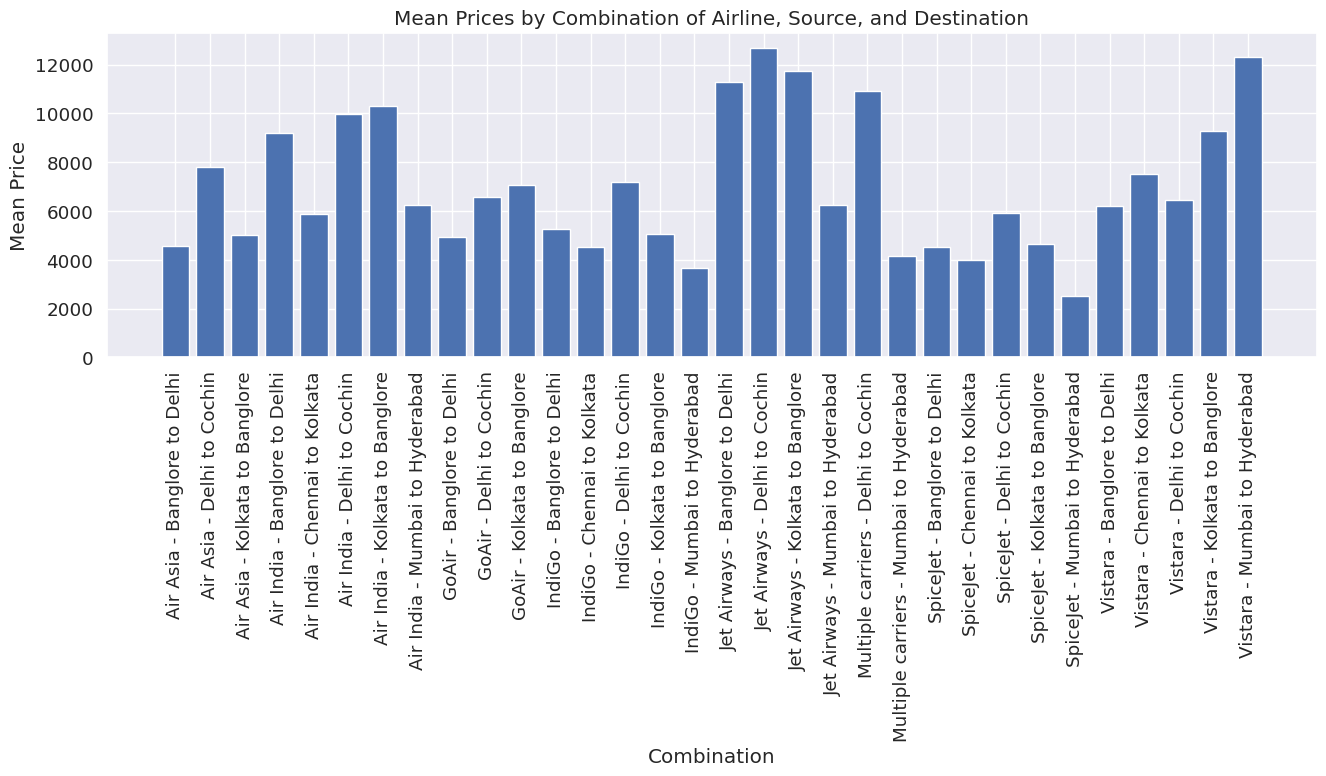

In [ ]:
mean_prices = df.groupby(['Airline', 'Source', 'Destination'], as_index=False)['Price'].mean()

# Create a bar plot
plt.figure(figsize=(13.5, 8))  # Adjust the figure size as needed
plt.bar(mean_prices.index, mean_prices['Price'])
plt.xlabel('Combination')
plt.ylabel('Mean Price')
plt.title('Mean Prices by Combination of Airline, Source, and Destination')
plt.xticks(mean_prices.index, [f'{row["Airline"]} - {row["Source"]} to {row["Destination"]}' for _, row in mean_prices.iterrows()], rotation=90)
plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Jet Airways - Delhi to Cochin & Vistara - Mumbai to Hyderabad flight has the highest average price.

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color:black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Handling Outliers - Using IQR Method </div>

In [ ]:
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

In [ ]:
df['Price'] = np.where(df['Price'] > upper_limit, upper_limit,
                                       np.where(df['Price'] < lower_limit,
                                                lower_limit, df['Price']))

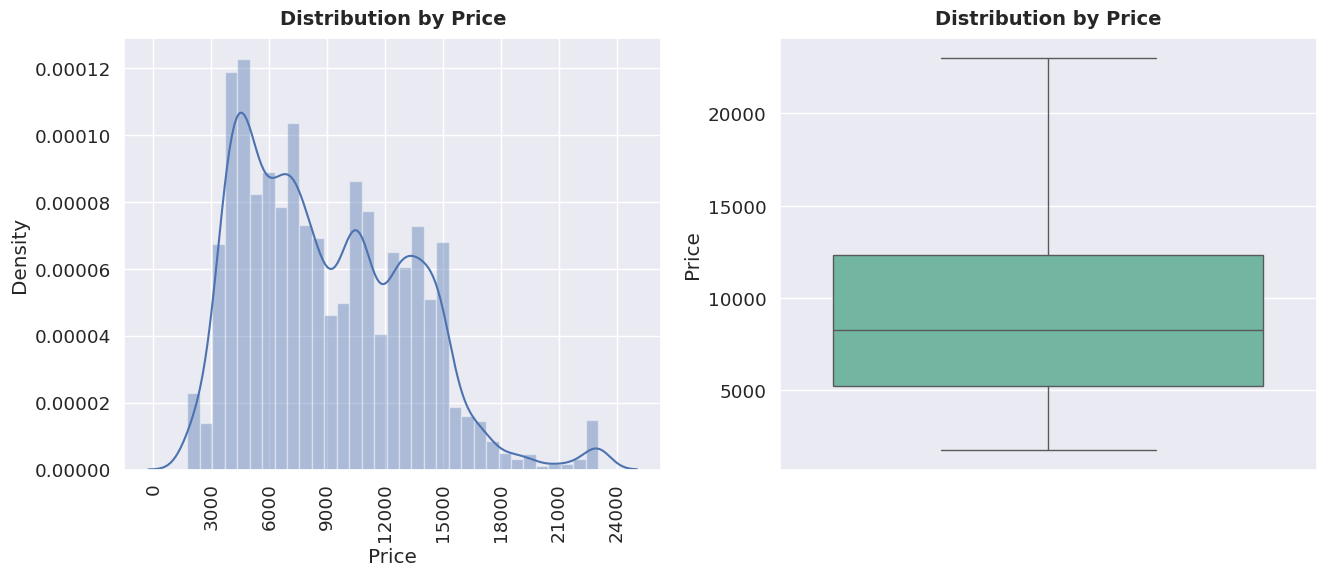

In [ ]:
dist_box_plot(df, 'Price')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* We have capped the outliers using 'IQR' Method.

In [ ]:
# dropping 'Dep_Time_Category', and 'Arrival_Time_Category' - we have extracted necessary features from it.

df = df.drop(['Dep_Time_Category', 'Arrival_Time_Category'], axis = 1)

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color:black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Encoding </div>

In [ ]:
#One Hot Encoding on Ordinal Column - 'Airline','Source','Destination'

df_new = pd.get_dummies(df, prefix = ['Airline','Source','Destination'], columns = ['Airline','Source','Destination'], drop_first = True)

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color:black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Checking Correlation </div>

<Axes: title={'center': 'Correlation Plot'}>

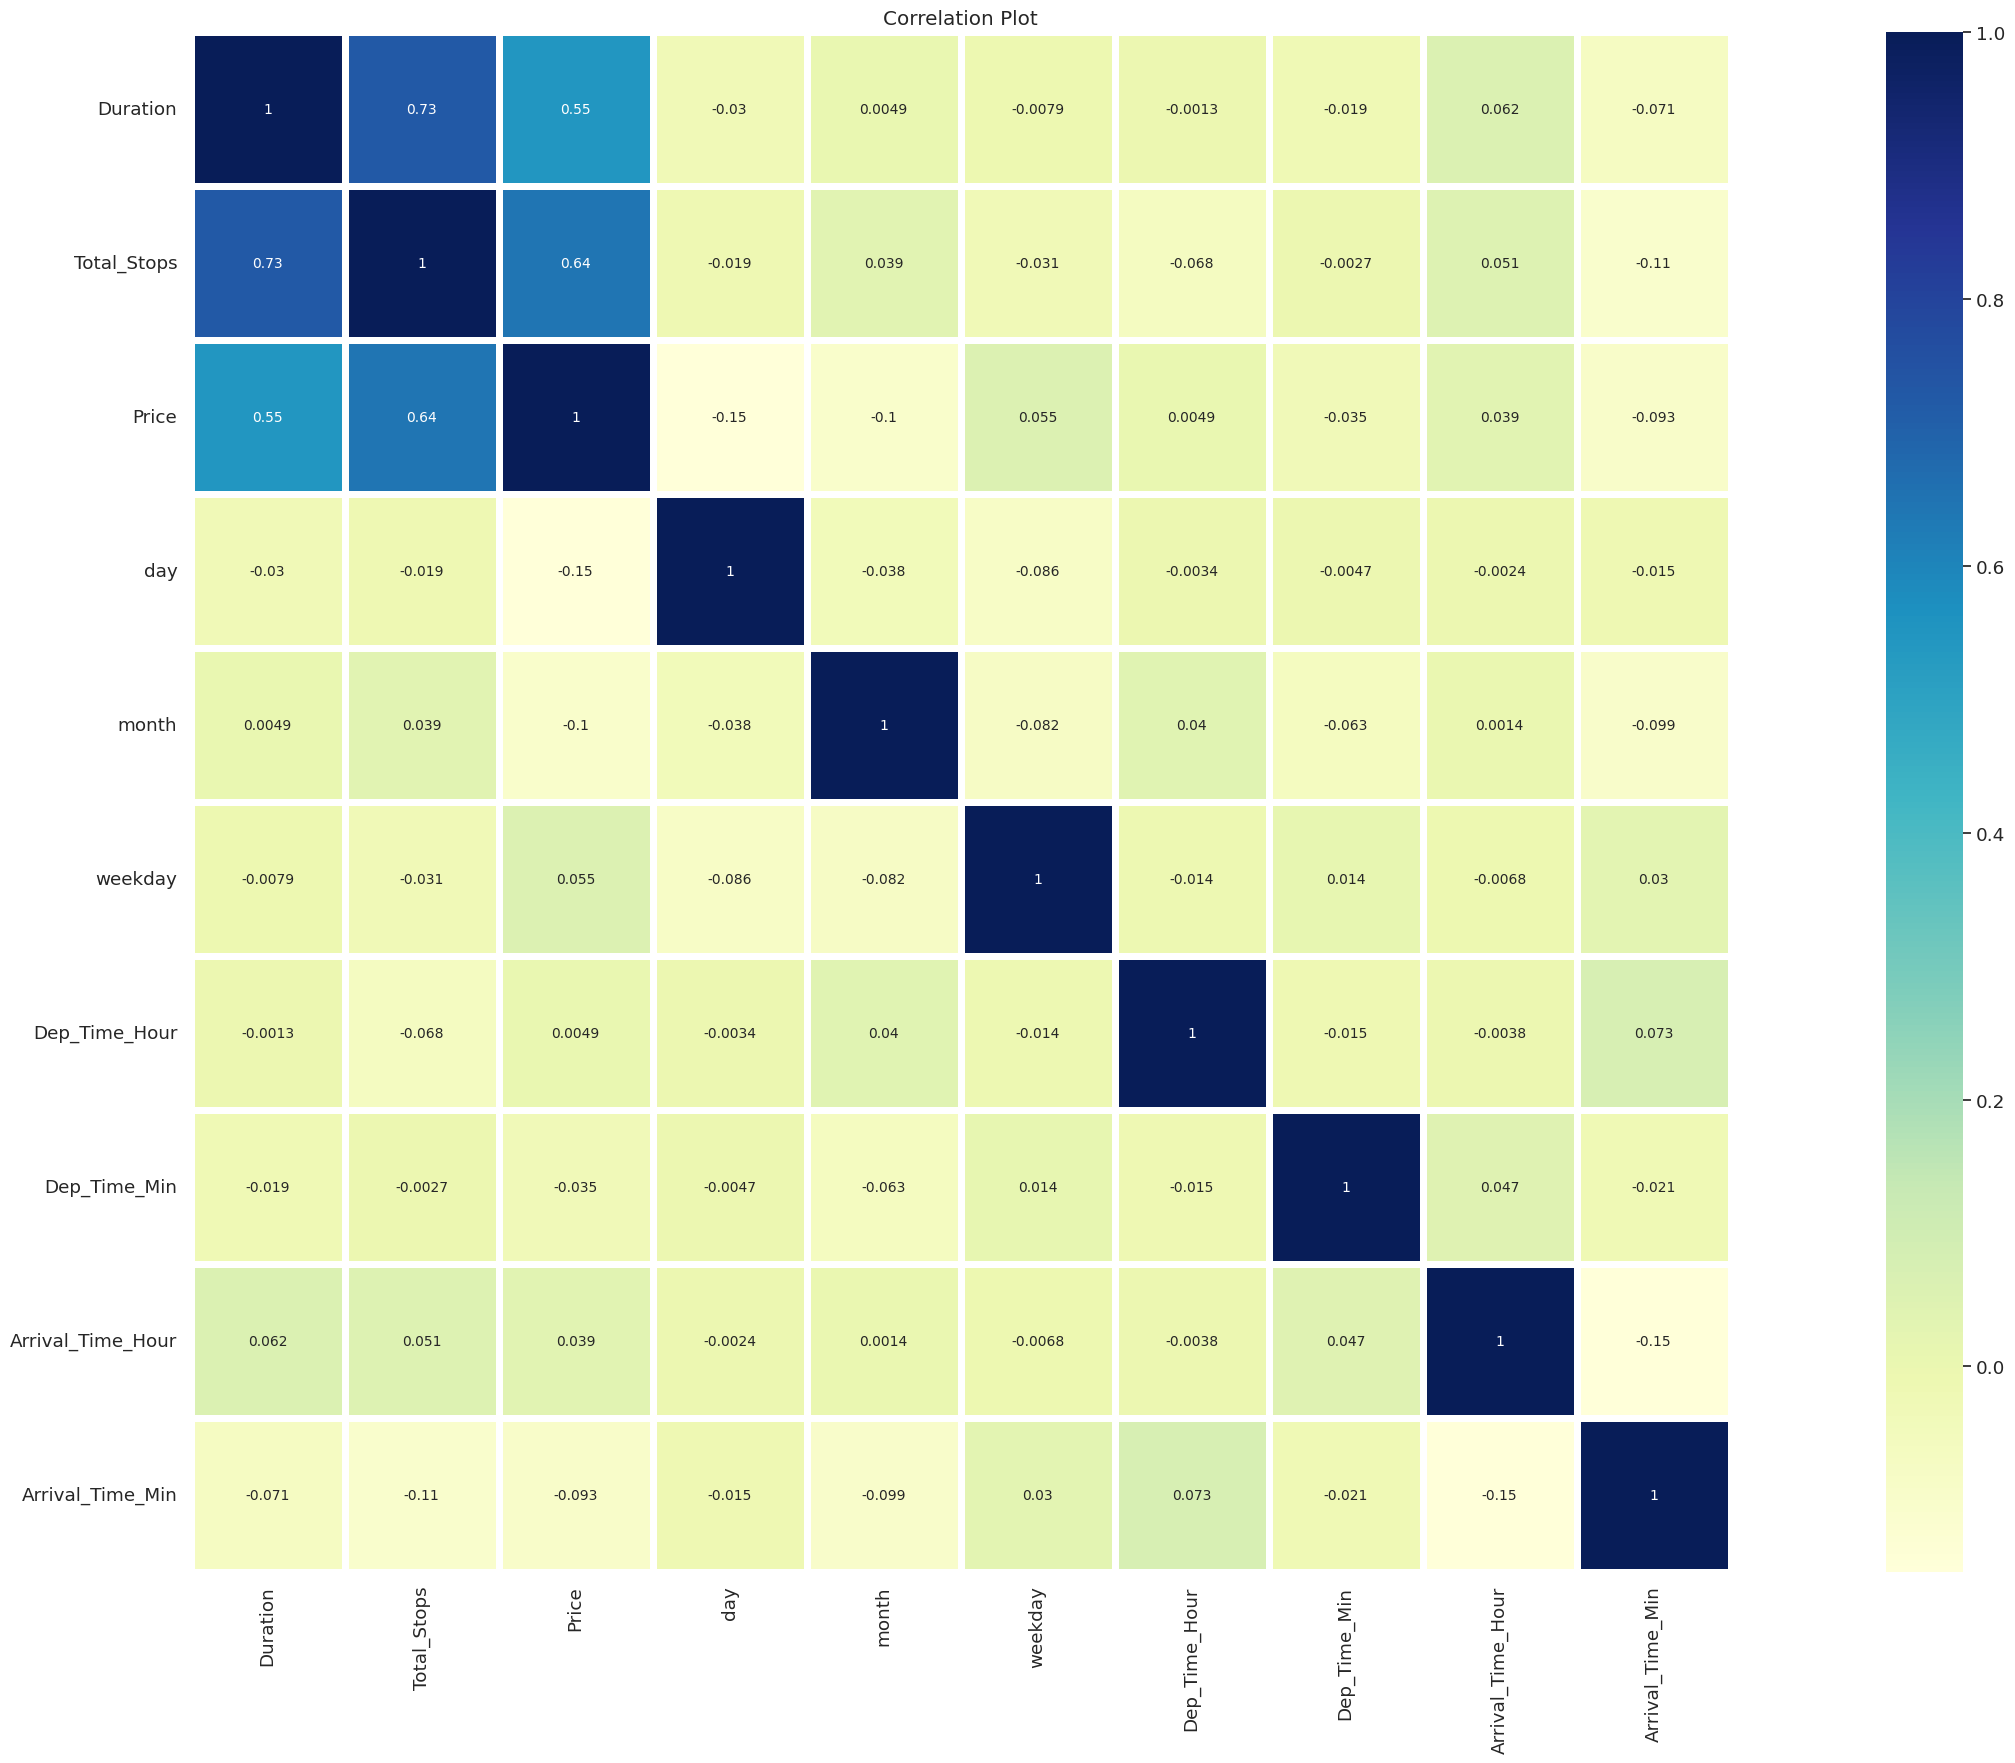

In [ ]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
df_numerical = df[numerical_columns]
sns.heatmap(df_numerical.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Split the Data into Independent and Dependent Variable </div>

In [ ]:
x=df_new.drop(['Price'],axis=1)
y=df_new['Price']

In [ ]:
x.head()

,Duration,Total_Stops,day,month,weekday,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,2.83,0,24,3,6,22,20,1,10,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
1,7.42,2,1,5,2,5,50,13,15,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,19.00,2,9,6,6,9,25,4,25,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False
3,5.42,1,12,5,6,18,5,23,30,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
4,4.75,1,1,3,4,16,50,21,35,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False


In [ ]:
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Feature Scaling </div>

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

In [ ]:
x_scaled = scaler.fit_transform(x)
df_scaled = scaler.fit_transform(df_new)

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* The VIF value for all the feature is below 5.
* There is no multi colinearity in the dataset

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Split the Data into Training and Test (Unscaled) </div>

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(8369, 24) (8369,) (2093, 24) (2093,)


## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Split the Data into Training and Test (Scaled) </div>

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train1.shape, y_train1.shape, x_test1.shape, y_test1.shape)

(8369, 24) (8369,) (2093, 24) (2093,)


## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Importing Necessary Libraries for Model Building </div>

In [ ]:
# Import libraries for Model Creation & Evaluation

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV


## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Model Building </div>

In [ ]:
r2_value = []
adjusted_r2_value = []
mae_value = []
mse_value = []
rmse_value = []

In [ ]:
#Creating a function for model evaluation - Scaled Data
def model_evaluation(model):
    model.fit(x_train1, y_train1)
    y_train_pred1= model.predict(x_train1)
    y_test_pred1 = model.predict(x_test1)

    #Metrics Calculation.
    mae = mean_absolute_error(y_test1,y_test_pred1)
    mse = mean_squared_error(y_test1,y_test_pred1)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test1,y_test_pred1)
    adjusted_r2 = 1 - ((1-r2)*(x_test1.shape[0]-1)/(x_test1.shape[0]-x_test1.shape[1]-1))

    mae_value.append(mae)
    mse_value.append(mse)
    rmse_value.append(rmse)
    r2_value.append(r2)
    adjusted_r2_value.append(adjusted_r2)

    print(f"R2 Score of the {model} model is: ",r2)
    print(f"Adjusted R2 Score of the {model} model is: ",adjusted_r2)
    print()
    print(f"MAE of {model} model is: ",mae)
    print(f"MSE of {model} model is: ",mse)
    print(f"RMSE of {model} model is: ",rmse)


    # Scatter plot.
    plt.figure(figsize = (20,6))
    plt.subplot(1,2,1)
    plt.scatter(y_train1, y_train_pred1, color='blue', label='Train')
    plt.scatter(y_test1, y_test_pred1, color='red', label='Test')
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.title('Scatter Plot',fontweight="black",size=20,pad=10)

    # Residual plot.
    plt.subplot(1,2,2)
    sns.distplot(y_test1-y_test_pred1)
    plt.title('Residual Plot',fontweight="black",size=20,pad=10)
    plt.show()

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Linear Regression Model </div>

R2 Score of the LinearRegression() model is:  0.6188663441229937
Adjusted R2 Score of the LinearRegression() model is:  0.6144431295480188

MAE of LinearRegression() model is:  1943.1065033131638
MSE of LinearRegression() model is:  6982242.836267956
RMSE of LinearRegression() model is:  2642.393391656124


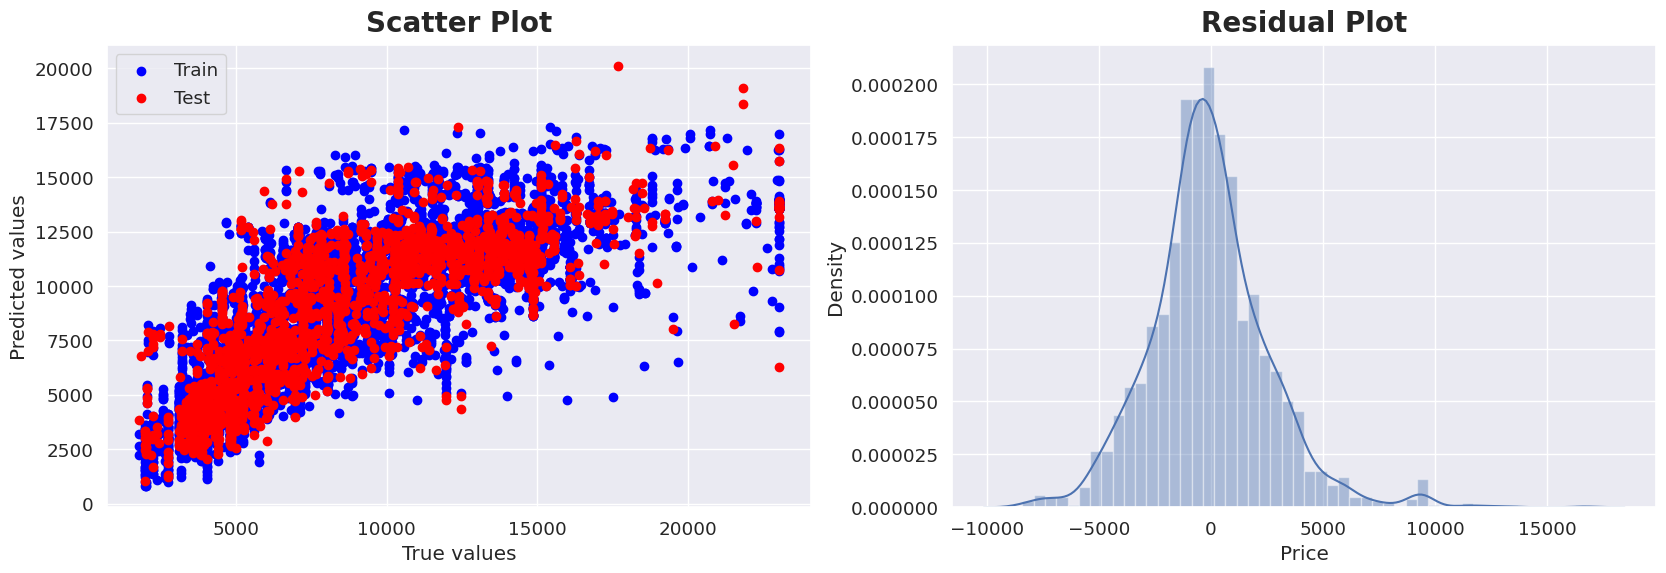

In [ ]:
model_evaluation(LinearRegression())

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Lasso </div>

R2 Score of the Lasso() model is:  0.619106504531945
Adjusted R2 Score of the Lasso() model is:  0.6146860771183893

MAE of Lasso() model is:  1941.4458592603623
MSE of Lasso() model is:  6977843.176807032
RMSE of Lasso() model is:  2641.5607463783663


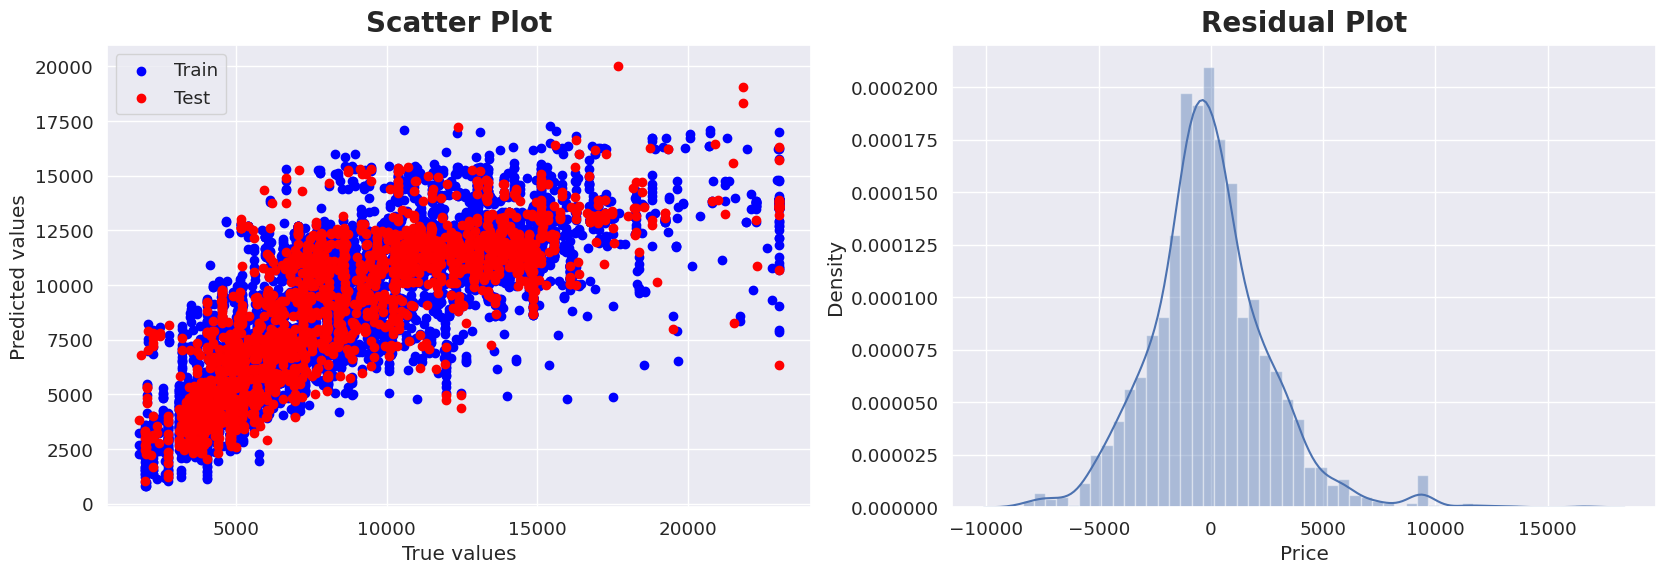

In [ ]:
model_evaluation(Lasso())

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Ridge </div>

R2 Score of the Ridge() model is:  0.6190936316996554
Adjusted R2 Score of the Ridge() model is:  0.6146730548915276

MAE of Ridge() model is:  1941.6866414796834
MSE of Ridge() model is:  6978079.002847717
RMSE of Ridge() model is:  2641.6053836346787


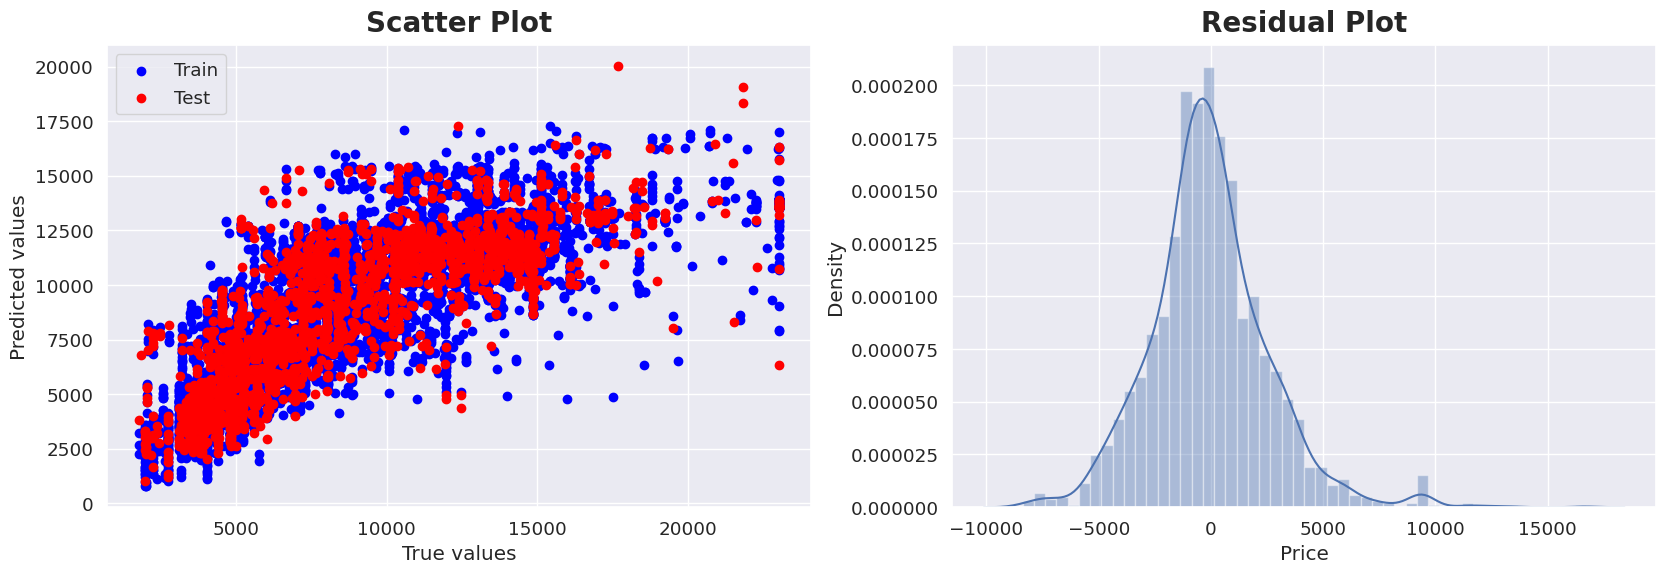

In [ ]:
model_evaluation(Ridge())

R2 Score of the KNeighborsRegressor() model is:  0.7715352748776311
Adjusted R2 Score of the KNeighborsRegressor() model is:  0.7688838467330774

MAE of KNeighborsRegressor() model is:  1379.649486383182
MSE of KNeighborsRegressor() model is:  4185398.3916874696
RMSE of KNeighborsRegressor() model is:  2045.8246238833547


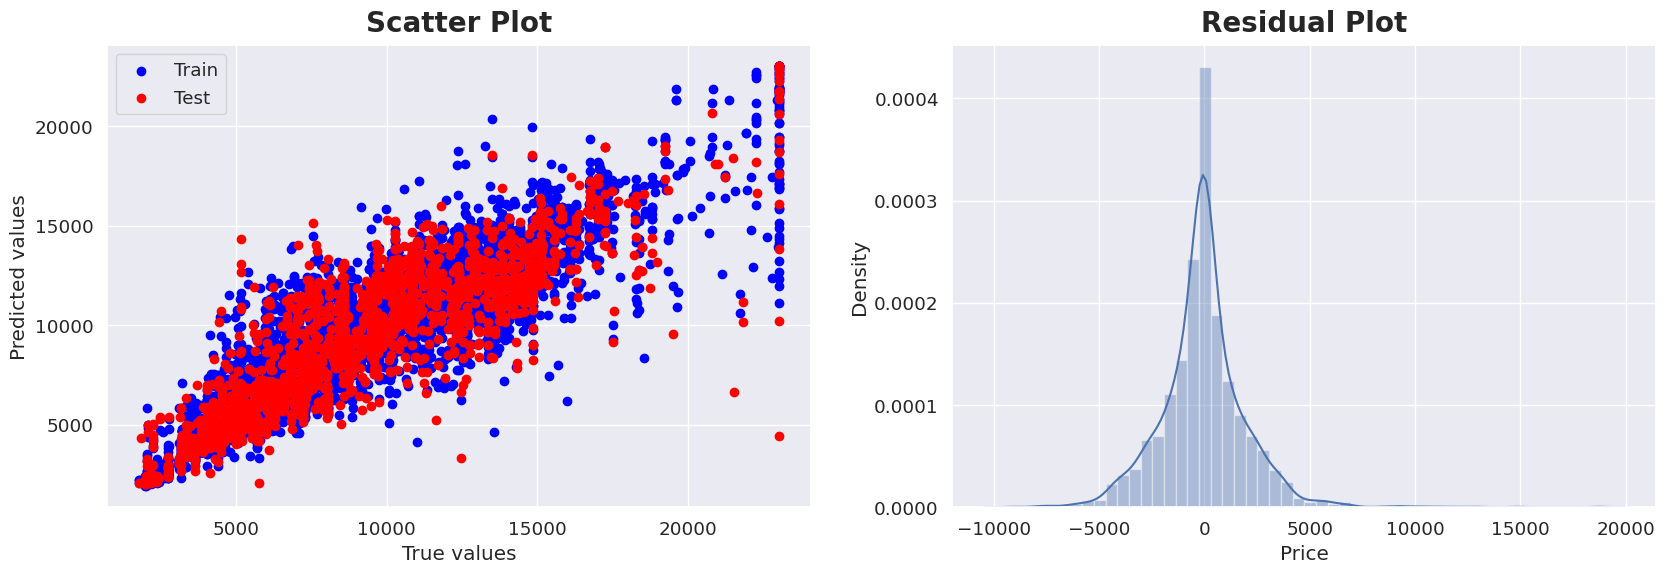

In [ ]:
model_evaluation(KNeighborsRegressor())

In [ ]:
#Creating a function for model evaluation - Unscaled Data
def model_evaluation(model):
    model.fit(x_train, y_train)
    y_train_pred= model.predict(x_train)
    y_test_pred = model.predict(x_test)

    #Metrics Calculation.
    mae = mean_absolute_error(y_test,y_test_pred)
    mse = mean_squared_error(y_test,y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_test_pred)
    adjusted_r2 = 1 - ((1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

    mae_value.append(mae)
    mse_value.append(mse)
    rmse_value.append(rmse)
    r2_value.append(r2)
    adjusted_r2_value.append(adjusted_r2)

    print(f"R2 Score of the {model} model is: ",r2)
    print(f"Adjusted R2 Score of the {model} model is: ",adjusted_r2)
    print()
    print(f"MAE of {model} model is: ",mae)
    print(f"MSE of {model} model is: ",mse)
    print(f"RMSE of {model} model is: ",rmse)


    # Scatter plot.
    plt.figure(figsize = (20,6))
    plt.subplot(1,2,1)
    plt.scatter(y_train, y_train_pred, color='blue', label='Train')
    plt.scatter(y_test, y_test_pred, color='red', label='Test')
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.title('Scatter Plot',fontweight="black",size=20,pad=10)

    # Residual plot.
    plt.subplot(1,2,2)
    sns.distplot(y_test-y_test_pred)
    plt.title('Residual Plot',fontweight="black",size=20,pad=10)
    plt.show()

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Decision Tree </div>

R2 Score of the DecisionTreeRegressor() model is:  0.7126726478781724
Adjusted R2 Score of the DecisionTreeRegressor() model is:  0.7093380944686347

MAE of DecisionTreeRegressor() model is:  1369.613115145724
MSE of DecisionTreeRegressor() model is:  5263742.299010922
RMSE of DecisionTreeRegressor() model is:  2294.284703128825


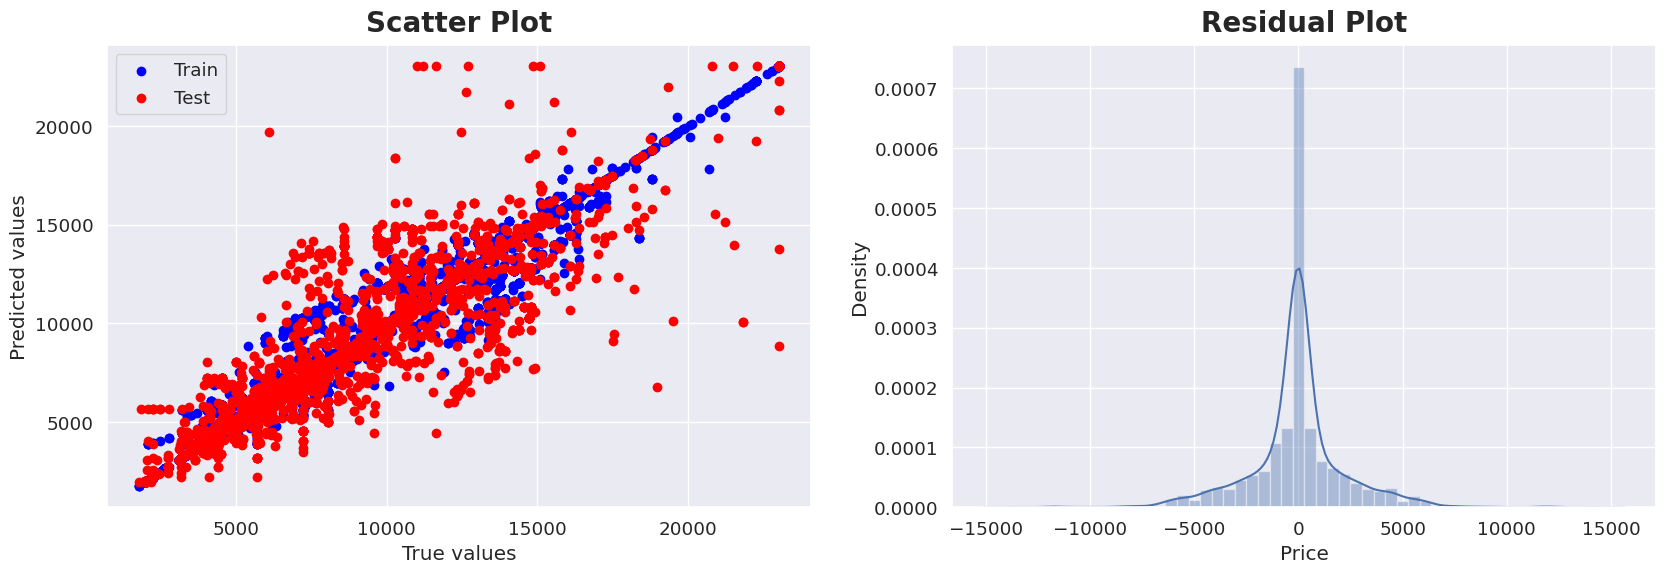

In [ ]:
model_evaluation(DecisionTreeRegressor())

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Random Forest </div>

R2 Score of the RandomForestRegressor() model is:  0.8283687679946101
Adjusted R2 Score of the RandomForestRegressor() model is:  0.8263769161724973

MAE of RandomForestRegressor() model is:  1119.8401113575867
MSE of RandomForestRegressor() model is:  3144227.5476616453
RMSE of RandomForestRegressor() model is:  1773.1969850136913


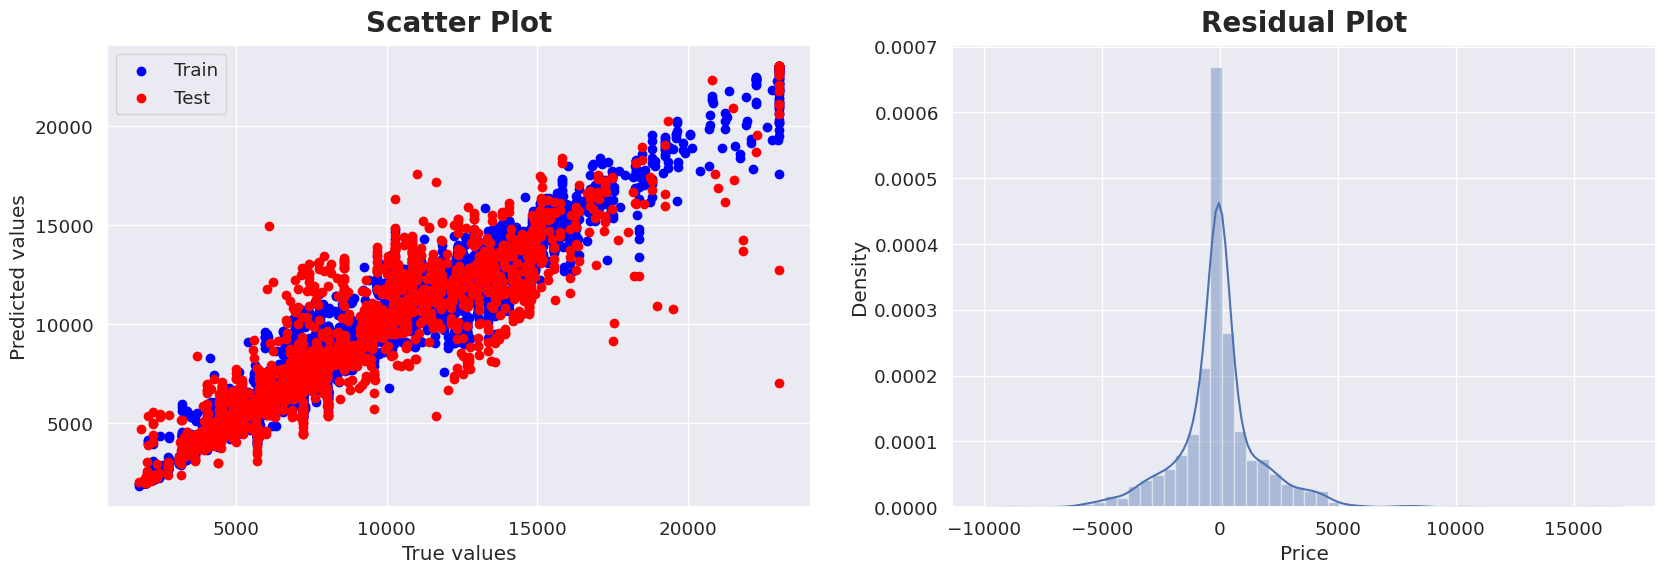

In [ ]:
model_evaluation(RandomForestRegressor())

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Combining Result in a DataFrame </div>

In [ ]:
algos = ["LinearRegression", "Lasso", "Ridge", "KNN",
         "DecisionTreeRegressor", "RandomForestRegressor"]

In [ ]:
new_df = pd.DataFrame({"Model":algos, "R2_Score": r2_value, "Adjusted_R2_Score": adjusted_r2_value,
                       "MAE" : mae_value,"MSE" : mse_value,"RMSE" : rmse_value})
new_df

,Model,R2_Score,Adjusted_R2_Score,MAE,MSE,RMSE
0,LinearRegression,0.618866,0.614443,1943.106503,6.982243e+06,2642.393392
1,Lasso,0.619107,0.614686,1941.445859,6.977843e+06,2641.560746
2,Ridge,0.619094,0.614673,1941.686641,6.978079e+06,2641.605384
3,KNN,0.771535,0.768884,1379.649486,4.185398e+06,2045.824624
4,DecisionTreeRegressor,0.712673,0.709338,1369.613115,5.263742e+06,2294.284703
5,RandomForestRegressor,0.828369,0.826377,1119.840111,3.144228e+06,1773.196985


from matplotlib import pyplot as plt
new_df['R2_Score'].plot(kind='hist', bins=20, title='R2_Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_df['Adjusted_R2_Score'].plot(kind='hist', bins=20, title='Adjusted_R2_Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_df['MAE'].plot(kind='hist', bins=20, title='MAE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_df['MSE'].plot(kind='hist', bins=20, title='MSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
new_df.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_df.plot(kind='scatter', x='R2_Score', y='Adjusted_R2_Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_df.plot(kind='scatter', x='Adjusted_R2_Score', y='MAE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_df.plot(kind='scatter', x='MAE', y='MSE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_df.plot(kind='scatter', x='MSE', y='RMSE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_df['R2_Score'].plot(kind='line', figsize=(8, 4), title='R2_Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
new_df['Adjusted_R2_Score'].plot(kind='line', figsize=(8, 4), title='Adjusted_R2_Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
new_df['MAE'].plot(kind='line', figsize=(8, 4), title='MAE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
new_df['MSE'].plot(kind='line', figsize=(8, 4), title='MSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(new_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(new_df, x='R2_Score', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(new_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(new_df, x='Adjusted_R2_Score', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(new_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(new_df, x='MAE', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(new_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(new_df, x='MSE', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Get user input
def get_user_input():
    airline = input("Enter the airline: ")
    source = input("Enter the source city: ")
    destination = input("Enter the destination city: ")
    total_stops = int(input("Enter the total number of stops: "))
    dep_time_hour = int(input("Enter the departure time hour (0-23): "))
    dep_time_min = int(input("Enter the departure time minute (0-59): "))
    arrival_time_hour = int(input("Enter the arrival time hour (0-23): "))
    arrival_time_min = int(input("Enter the arrival time minute (0-59): "))
    duration = float(input("Enter the flight duration (in hours): "))
    day = int(input("Enter the day of the month (1-31): "))
    month = int(input("Enter the month (1-12): "))
    weekday = int(input("Enter the weekday (0 for Monday, 1 for Tuesday, ..., 6 for Sunday): "))

    user_data = {
        'Airline': airline,
        'Source': source,
        'Destination': destination,
        'Total_Stops': total_stops,
        'Dep_Time_Hour': dep_time_hour,
        'Dep_Time_Min': dep_time_min,
        'Arrival_Time_Hour': arrival_time_hour,
        'Arrival_Time_Min': arrival_time_min,
        'Duration': duration,
        'day': day,
        'month': month,
        'weekday': weekday
    }

    return user_data

# Preprocess user input data
def preprocess_user_input(user_data):
    user_df = pd.DataFrame([user_data])
    user_df = pd.get_dummies(user_df, prefix=['Airline', 'Source', 'Destination'], columns=['Airline', 'Source', 'Destination'], drop_first=True)
    user_scaled = scaler.transform(user_df)
    return user_scaled

# Load the trained model
model = RandomForestRegressor()
model.fit(x_train1, y_train1)  # Assuming you have already trained the model and have x_train1 and y_train1

# Get the scaler object
scaler = StandardScaler()
scaler.fit(df_new.drop(['Price'], axis=1))

# Get user input
user_input = get_user_input()

# Preprocess user input data
processed_input = preprocess_user_input(user_input)

# Make the prediction
predicted_price = model.predict(processed_input.reshape(1, -1))
print(f"The predicted price for the flight ticket is: {predicted_price[0]}")

Enter the airline: Indigo


NameError: name 'source' is not defined